Problem Statement : Using machine learning to create a Logistic regression model that predicts which passengers 
survived the Titanic shipwreck.

### Step1: Reading the data set

In [1]:
#import libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
titanicDf=pd.read_csv("train.csv")
titanicDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanicDf.shape

(891, 12)

### Step 2: Understanding the data set

In [4]:
titanicDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#check for count of null values in all the columns

In [6]:
titanicDf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Step 3: Cleaning the data set

In [7]:
#removing cabin as it has lot of missing values
titanicDf.drop(columns="Cabin",axis=1,inplace=True)

In [8]:
print(titanicDf["Age"].mean())
print(titanicDf["Age"].median())
print(titanicDf["Age"].mode()[0])

29.69911764705882
28.0
24.0


In [9]:
# imputing median age for all missing age 
titanicDf["Age"].fillna(value=28,inplace=True)

In [10]:
#removing rows with embarked missing
titanicDf=titanicDf[~titanicDf["Embarked"].isnull()]

In [11]:
titanicDf.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
titanicDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
# dropping passenger Id,name and ticket variables as they are not needed for prediction
titanicDf.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [14]:
titanicDf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
#create dummies for categorical variables
df1=pd.get_dummies(titanicDf[["Sex","Embarked"]],drop_first=True)

In [16]:
df1.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [17]:
#concat dummy df with original df
titanicDf=pd.concat([titanicDf,df1],axis=1)

In [18]:
titanicDf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_male,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [19]:
#drop redundant columns
titanicDf.drop(["Sex","Embarked"],axis=1,inplace=True)

### Step 4 : Feature Scaling

In [20]:
# perform scaling on numerical variables
num_vars=["Pclass","Age","SibSp","Parch","Fare"]

In [21]:
#using Min Max scaling for numerical variables
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [22]:
titanicDf[num_vars] = scaler.fit_transform(titanicDf[num_vars])
titanicDf.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,1.0,0.271174,0.125,0.0,0.014151,1,0,1
1,1,0.0,0.472229,0.125,0.0,0.139136,0,0,0
2,1,1.0,0.321438,0.000,0.0,0.015469,0,0,1
3,1,0.0,0.434531,0.125,0.0,0.103644,0,0,1
4,0,1.0,0.434531,0.000,0.0,0.015713,1,0,1


### Step 5: Dividing into X,y 

In [23]:
X_train = titanicDf.drop(['Survived'], axis=1)

X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1.0,0.271174,0.125,0.0,0.014151,1,0,1
1,0.0,0.472229,0.125,0.0,0.139136,0,0,0
2,1.0,0.321438,0.000,0.0,0.015469,0,0,1
3,0.0,0.434531,0.125,0.0,0.103644,0,0,1
4,1.0,0.434531,0.000,0.0,0.015713,1,0,1


In [24]:
y_train=titanicDf["Survived"]

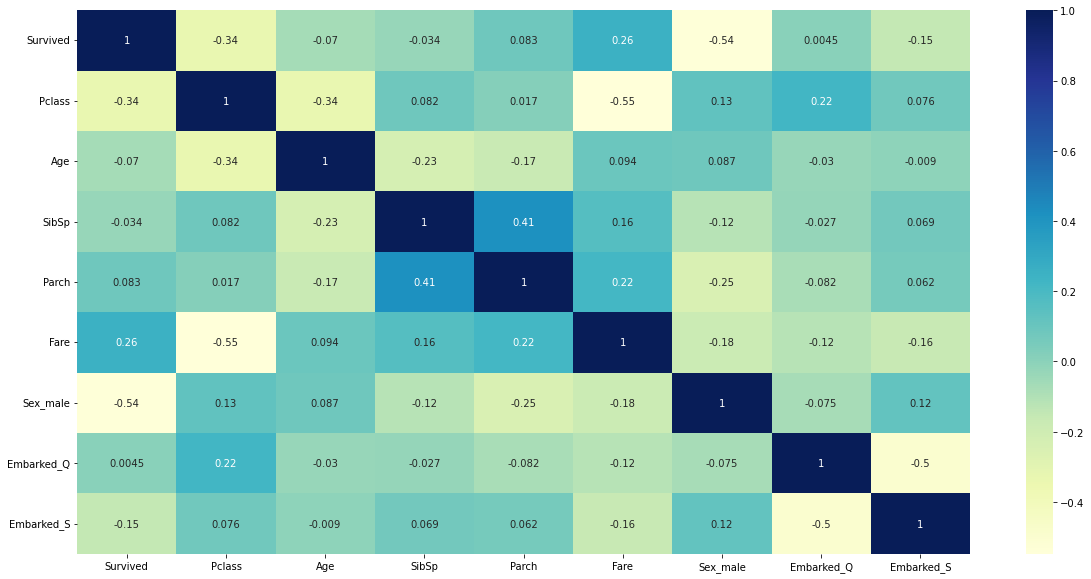

In [25]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (20,10))        # Size of the figure

# finding the correlation between numerical variables
sns.heatmap(titanicDf.corr(),annot = True,cmap="YlGnBu")
plt.show()

### Step 6: Model Building

In [26]:
import statsmodels.api as sm

In [27]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      880
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.47
Date:                Wed, 20 Apr 2022   Deviance:                       784.93
Time:                        22:25:41   Pearson chi2:                     902.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1317      0.455      9.073      0.000       3.239       5.024
Pclass        -2.1973      0.287     -7.654      0.000      -2.760      -1.635
Age           -3.1299      0.624     -5.013      0.000      -4.353      -1.906
SibSp         -2.5939      0.871     -2.978      0.003      -4.301      -0.887
Parch         -0.5318      0.711     -0.748      0.454      -1.925       0.862
Fare           0.9939      1.216      0.817      0.414      -1.390       3.378
Sex_male      -2.7199      0.201    -13.555      0.000      -3.113      -2.327
Embarked_Q    -0.0628      0.381     -0.165      0.869      -0.810       0.685
Embarked_S    -0.4115      0.237     -1.739      0.082      -0.875       0.052
==============================================================================
"""

In [28]:
# since p-value of certain variables is >0.05, we are using RFE to elminate certain variables

In [29]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [30]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 5)             # running RFE with 5 variables as output
rfe = rfe.fit(X_train,y_train)

In [31]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Pclass', True, 1),
 ('Age', True, 1),
 ('SibSp', True, 1),
 ('Parch', False, 3),
 ('Fare', False, 2),
 ('Sex_male', True, 1),
 ('Embarked_Q', False, 4),
 ('Embarked_S', True, 1)]

In [32]:
col = X_train.columns[rfe.support_]

In [33]:
X_train.columns[~rfe.support_]

Index(['Parch', 'Fare', 'Embarked_Q'], dtype='object')

### Step 6 :Making Predictions

In [34]:
# Adding constant with new variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      883
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -393.01
Date:                Wed, 20 Apr 2022   Deviance:                       786.02
Time:                        22:25:41   Pearson chi2:                     910.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2324      0.403     10.497      0.000       3.442       5.023
Pclass        -2.3274      0.241     -9.654      0.000      -2.800      -1.855
Age           -3.1395      0.621     -5.059      0.000      -4.356      -1.923
SibSp         -2.6379      0.824     -3.201      0.001      -4.253      -1.023
Sex_male      -2.6936      0.194    -13.860      0.000      -3.074      -2.313
Embarked_S    -0.4291      0.198     -2.165      0.030      -0.818      -0.041
==============================================================================
"""

In [35]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.083268
1    0.918349
2    0.614613
3    0.891812
4    0.070314
5    0.132776
6    0.268157
7    0.093704
8    0.605228
9    0.900538
dtype: float64

In [36]:
y_pred_final = pd.DataFrame({'Survived':y_train.values, 'Survived_Prob':y_train_pred})
y_pred_final['PassengerId'] = y_train.index+1
y_pred_final.head()

,Survived,Survived_Prob,PassengerId
0,0,0.083268,1
1,1,0.918349,2
2,1,0.614613,3
3,1,0.891812,4
4,0,0.070314,5


In [37]:
# Setting predicted variable to 1 if probability is >0.5 

In [38]:
y_pred_final['predicted'] = y_pred_final.Survived_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_pred_final.head()

,Survived,Survived_Prob,PassengerId,predicted
0,0,0.083268,1,0
1,1,0.918349,2,1
2,1,0.614613,3,1
3,1,0.891812,4,1
4,0,0.070314,5,0


In [39]:
# building the confusion matrix
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.Survived, y_pred_final.predicted )
print(confusion)

[[461  88]
 [ 95 245]]


In [40]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_pred_final.Survived, y_pred_final.predicted))

0.7941507311586051


In [41]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Embarked_S,3.32
1,Age,3.19
3,Sex_male,2.93
0,Pclass,2.78
2,SibSp,1.24


All VIF values are less tha 5. So no need to remove any variables

In [43]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [44]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7205882352941176

In [45]:
# Let us calculate specificity
TN / float(TN+FP)

0.8397085610200364

In [46]:
# Calculate false postive rate - predicting survived when passenger did not
print(FP/ float(TN+FP))

0.16029143897996356


In [47]:
# positive predictive value 
print (TP / float(TP+FP))

0.7357357357357357


In [48]:
# Negative predictive value
print (TN / float(TN+ FN))

0.829136690647482


In [49]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [50]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Survived, y_pred_final.Survived_Prob, drop_intermediate = False )

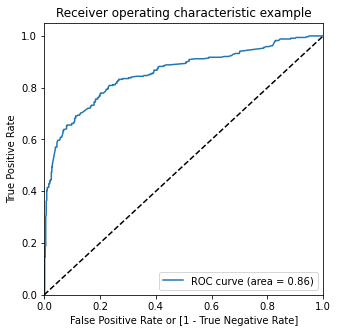

In [51]:
draw_roc(y_pred_final.Survived, y_pred_final.Survived_Prob)

In [52]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Survived_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head()

,Survived,Survived_Prob,PassengerId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.083268,1,0,1,0,0,0,0,0,0,0,0,0
1,1,0.918349,2,1,1,1,1,1,1,1,1,1,1,1
2,1,0.614613,3,1,1,1,1,1,1,1,1,0,0,0
3,1,0.891812,4,1,1,1,1,1,1,1,1,1,1,0
4,0,0.070314,5,0,1,0,0,0,0,0,0,0,0,0


In [53]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.Survived, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.382452  1.000000  0.000000
0.1   0.1  0.557930  0.923529  0.331512
0.2   0.2  0.712036  0.850000  0.626594
0.3   0.3  0.770529  0.823529  0.737705
0.4   0.4  0.790776  0.761765  0.808743
0.5   0.5  0.794151  0.720588  0.839709
0.6   0.6  0.816648  0.655882  0.916211
0.7   0.7  0.791901  0.502941  0.970856
0.8   0.8  0.753656  0.370588  0.990893
0.9   0.9  0.689539  0.197059  0.994536


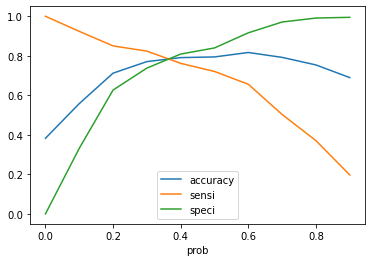

In [54]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

All curves coincides at 0.35 hence taking it as the cutoff

In [55]:
y_pred_final['final_predicted'] = y_pred_final.Survived_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_pred_final.head()

,Survived,Survived_Prob,PassengerId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.083268,1,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.918349,2,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.614613,3,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.891812,4,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.070314,5,0,1,0,0,0,0,0,0,0,0,0,0


In [56]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Survived, y_pred_final.final_predicted)

0.7840269966254219

In [57]:
# building confusion matrix with new cutoff
confusion2 = metrics.confusion_matrix(y_pred_final.Survived, y_pred_final.final_predicted )
confusion2

array([[432, 117],
       [ 75, 265]])

In [58]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [59]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7794117647058824

In [60]:
# Let us calculate specificity
TN / float(TN+FP)

0.7868852459016393

In [61]:
# Calculate false postive rate - predicting Survived when passenger did not
print(FP/ float(TN+FP))

0.21311475409836064


In [62]:
# Positive predictive value 
print (TP / float(TP+FP))

0.693717277486911


In [63]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8520710059171598


## Precision and Recall

In [64]:
#Looking at the confusion matrix again

In [65]:
confusion = metrics.confusion_matrix(y_pred_final.Survived, y_pred_final.predicted )
confusion

array([[461,  88],
       [ 95, 245]])

##### Precision
TP / TP + FP

In [66]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7357357357357357

##### Recall
TP / TP + FN

In [67]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7205882352941176

Using sklearn utilities for the same

In [68]:
from sklearn.metrics import precision_score, recall_score

In [69]:
precision_score(y_pred_final.Survived, y_pred_final.predicted)

0.7357357357357357

In [70]:
recall_score(y_pred_final.Survived, y_pred_final.predicted)

0.7205882352941176

### Precision and recall tradeoff

In [71]:
from sklearn.metrics import precision_recall_curve

In [72]:
y_pred_final.Survived, y_pred_final.predicted

(0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 889, dtype: int64,
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    1
 889    1
 890    0
 Name: predicted, Length: 889, dtype: int64)

In [73]:
p, r, thresholds = precision_recall_curve(y_pred_final.Survived, y_pred_final.Survived_Prob)

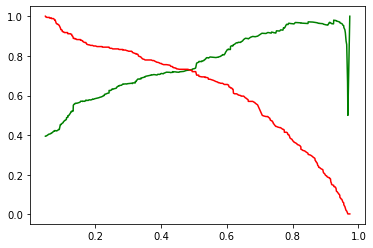

In [74]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 7: Making predictions on the test set

In [75]:
testDf=pd.read_csv("test.csv")

In [76]:
testDf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [77]:
testDf.shape

(418, 11)

In [78]:
testDf.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [79]:
X_test=testDf

In [80]:
#removing cabin as it has lot of missing values
X_test=X_test.drop(columns="Cabin",axis=1)

In [81]:
print(X_test["Age"].mean())
print(X_test["Age"].median())
print(X_test["Age"].mode()[0])

30.272590361445783
27.0
21.0


In [82]:
# imputing median age for all missing age 
X_test["Age"].fillna(value=27,inplace=True)

In [83]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [84]:
# dropping passenger Id,name and ticket variables
X_test=X_test.drop(["PassengerId","Name","Ticket"],axis=1)

In [85]:
testDf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [86]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [87]:
df1=pd.get_dummies(X_test[["Sex","Embarked"]],drop_first=True)

In [88]:
df1.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,1,0
1,0,0,1
2,1,1,0
3,1,0,1
4,0,0,1


In [89]:
X_test=pd.concat([X_test,df1],axis=1)

In [90]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_male,Embarked_Q,Embarked_S
0,3,male,34.5,0,0,7.8292,Q,1,1,0
1,3,female,47.0,1,0,7.0000,S,0,0,1
2,2,male,62.0,0,0,9.6875,Q,1,1,0
3,3,male,27.0,0,0,8.6625,S,1,0,1
4,3,female,22.0,1,1,12.2875,S,0,0,1


In [91]:
#drop redundant columns
X_test.drop(["Sex","Embarked"],axis=1,inplace=True)


In [92]:
X_test.shape

(418, 8)

In [93]:
# perform scaling on numerical variables
num_vars=["Pclass","Age","SibSp","Fare","Parch"]
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [94]:
X_test = X_test[col]
X_test.head()

,Pclass,Age,SibSp,Sex_male,Embarked_S
0,1.0,0.428248,0.000,1,0
1,1.0,0.585323,0.125,0,1
2,0.5,0.773813,0.000,1,0
3,1.0,0.334004,0.000,1,1
4,1.0,0.271174,0.125,0,1


In [95]:
X_test.shape

(418, 5)

In [96]:
X_test_sm = sm.add_constant(X_test)

In [97]:
y_test_pred = res.predict(X_test_sm)

In [98]:
y_test_pred.head()

0    0.105925
1    0.333711
2    0.113626
3    0.093955
4    0.573173
dtype: float64

In [99]:
y_test_pred_final = pd.DataFrame(y_test_pred)

In [100]:
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Survival_Prob'})

In [101]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Survival_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [102]:
y_test_pred_final.head()

,Survival_Prob,final_predicted
0,0.105925,0
1,0.333711,0
2,0.113626,0
3,0.093955,0
4,0.573173,1


In [103]:
y_test_pred_final= y_test_pred_final.rename(columns={ 'final_predicted' : 'Survived'})

In [104]:
X_test=pd.concat([X_test,y_test_pred_final],axis=1)

In [105]:
X_test.head()

,Pclass,Age,SibSp,Sex_male,Embarked_S,Survival_Prob,Survived
0,1.0,0.428248,0.000,1,0,0.105925,0
1,1.0,0.585323,0.125,0,1,0.333711,0
2,0.5,0.773813,0.000,1,0,0.113626,0
3,1.0,0.334004,0.000,1,1,0.093955,0
4,1.0,0.271174,0.125,0,1,0.573173,1


In [106]:
X_test["Survived"].value_counts()

0    226
1    192
Name: Survived, dtype: int64

In [107]:
y_pred_final.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [108]:
X_test.head()

,Pclass,Age,SibSp,Sex_male,Embarked_S,Survival_Prob,Survived
0,1.0,0.428248,0.000,1,0,0.105925,0
1,1.0,0.585323,0.125,0,1,0.333711,0
2,0.5,0.773813,0.000,1,0,0.113626,0
3,1.0,0.334004,0.000,1,1,0.093955,0
4,1.0,0.271174,0.125,0,1,0.573173,1


In [109]:
testDf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [110]:
# Final Survived flag for all passengers
finalDf=pd.concat([testDf["PassengerId"],X_test["Survived"]],axis=1)
finalDf.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [111]:
finalDf.to_csv("Titanic_Prediction.csv")